## 内容

- Kubernetes简介
- Kubernetes概念
- Kubernetes命令
- Kubernetes配置文件



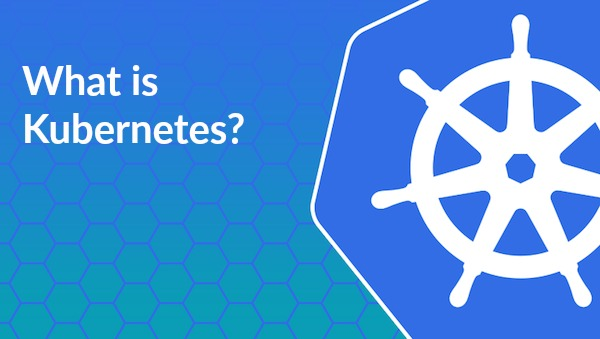

#### 简介
Kubernetes 是 Google 团队发起并维护的基于 Docker 的开源容器集群管理系统，它不仅支持常见的云平台，而且支持内部数据中心。

建于 Docker 之上的 Kubernetes 可以构建一个容器的调度服务，其目的是让用户透过 Kubernetes 集群来进行云端容器集群的管理，而无需用户进行复杂的设置工作。系统会自动选取合适的工作节点来执行具体的容器集群调度处理工作。

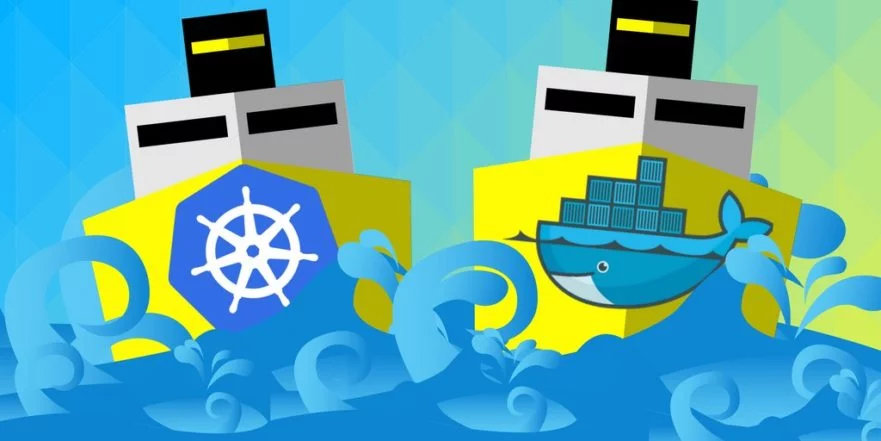



## 架构
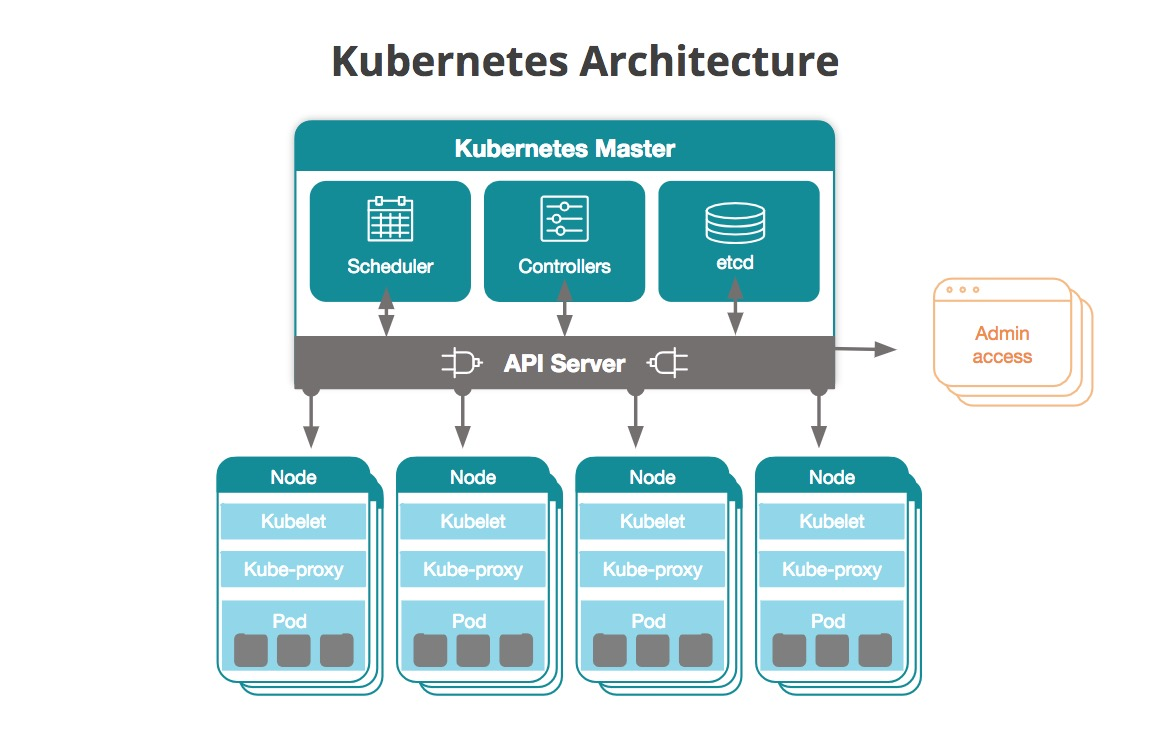

- Master
    - Scheduler
    - ETCD
    - API Server
    - Admin access
- Node
    - Pod
    - Kubelet
    - Kube-proxy
    - Controllers


### POD 生命周期
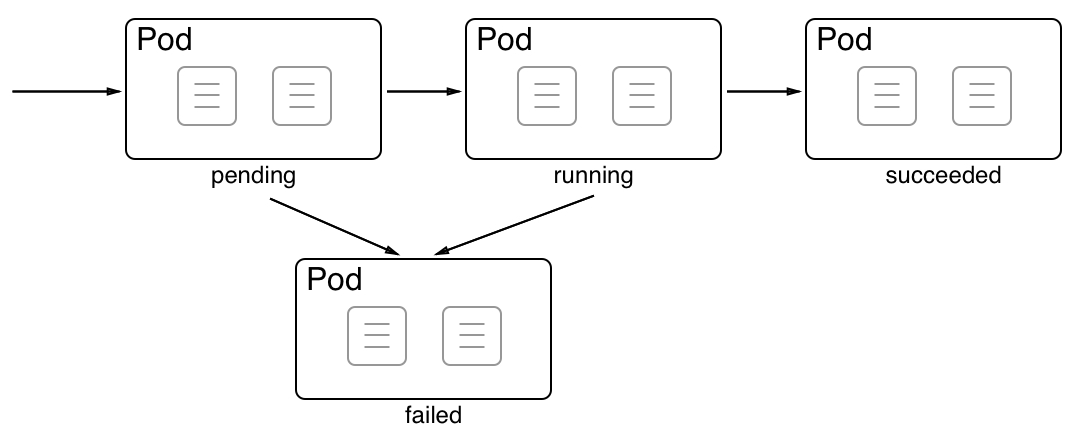


### 为什么要POD而不是container
<img src="images/pod.svg" width="400px" height="500px" />

### POD and autoscaling
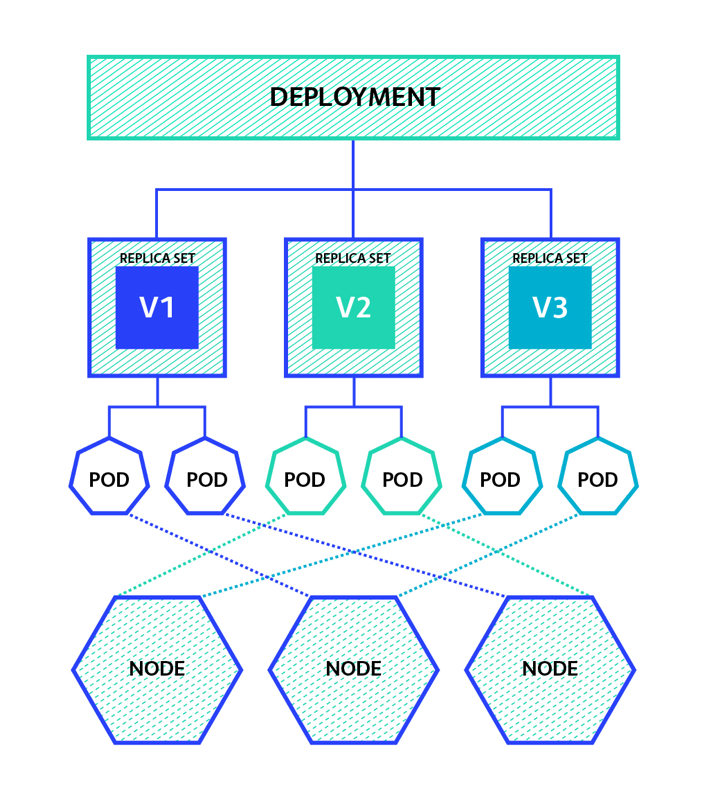



### Orchestration and auto-scaling
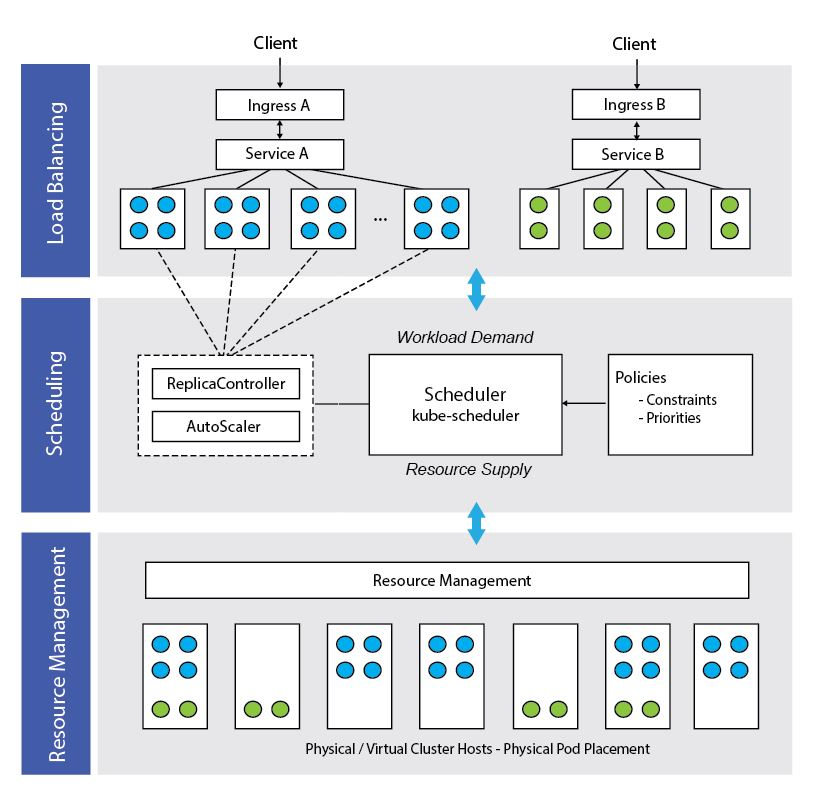


### Service
<img src="images/load_balencing.gif" />


### how does service works (label selector)

<img src="images/label_selector.svg" width="600px" height="800px" />

### Controller

#### cloud controller
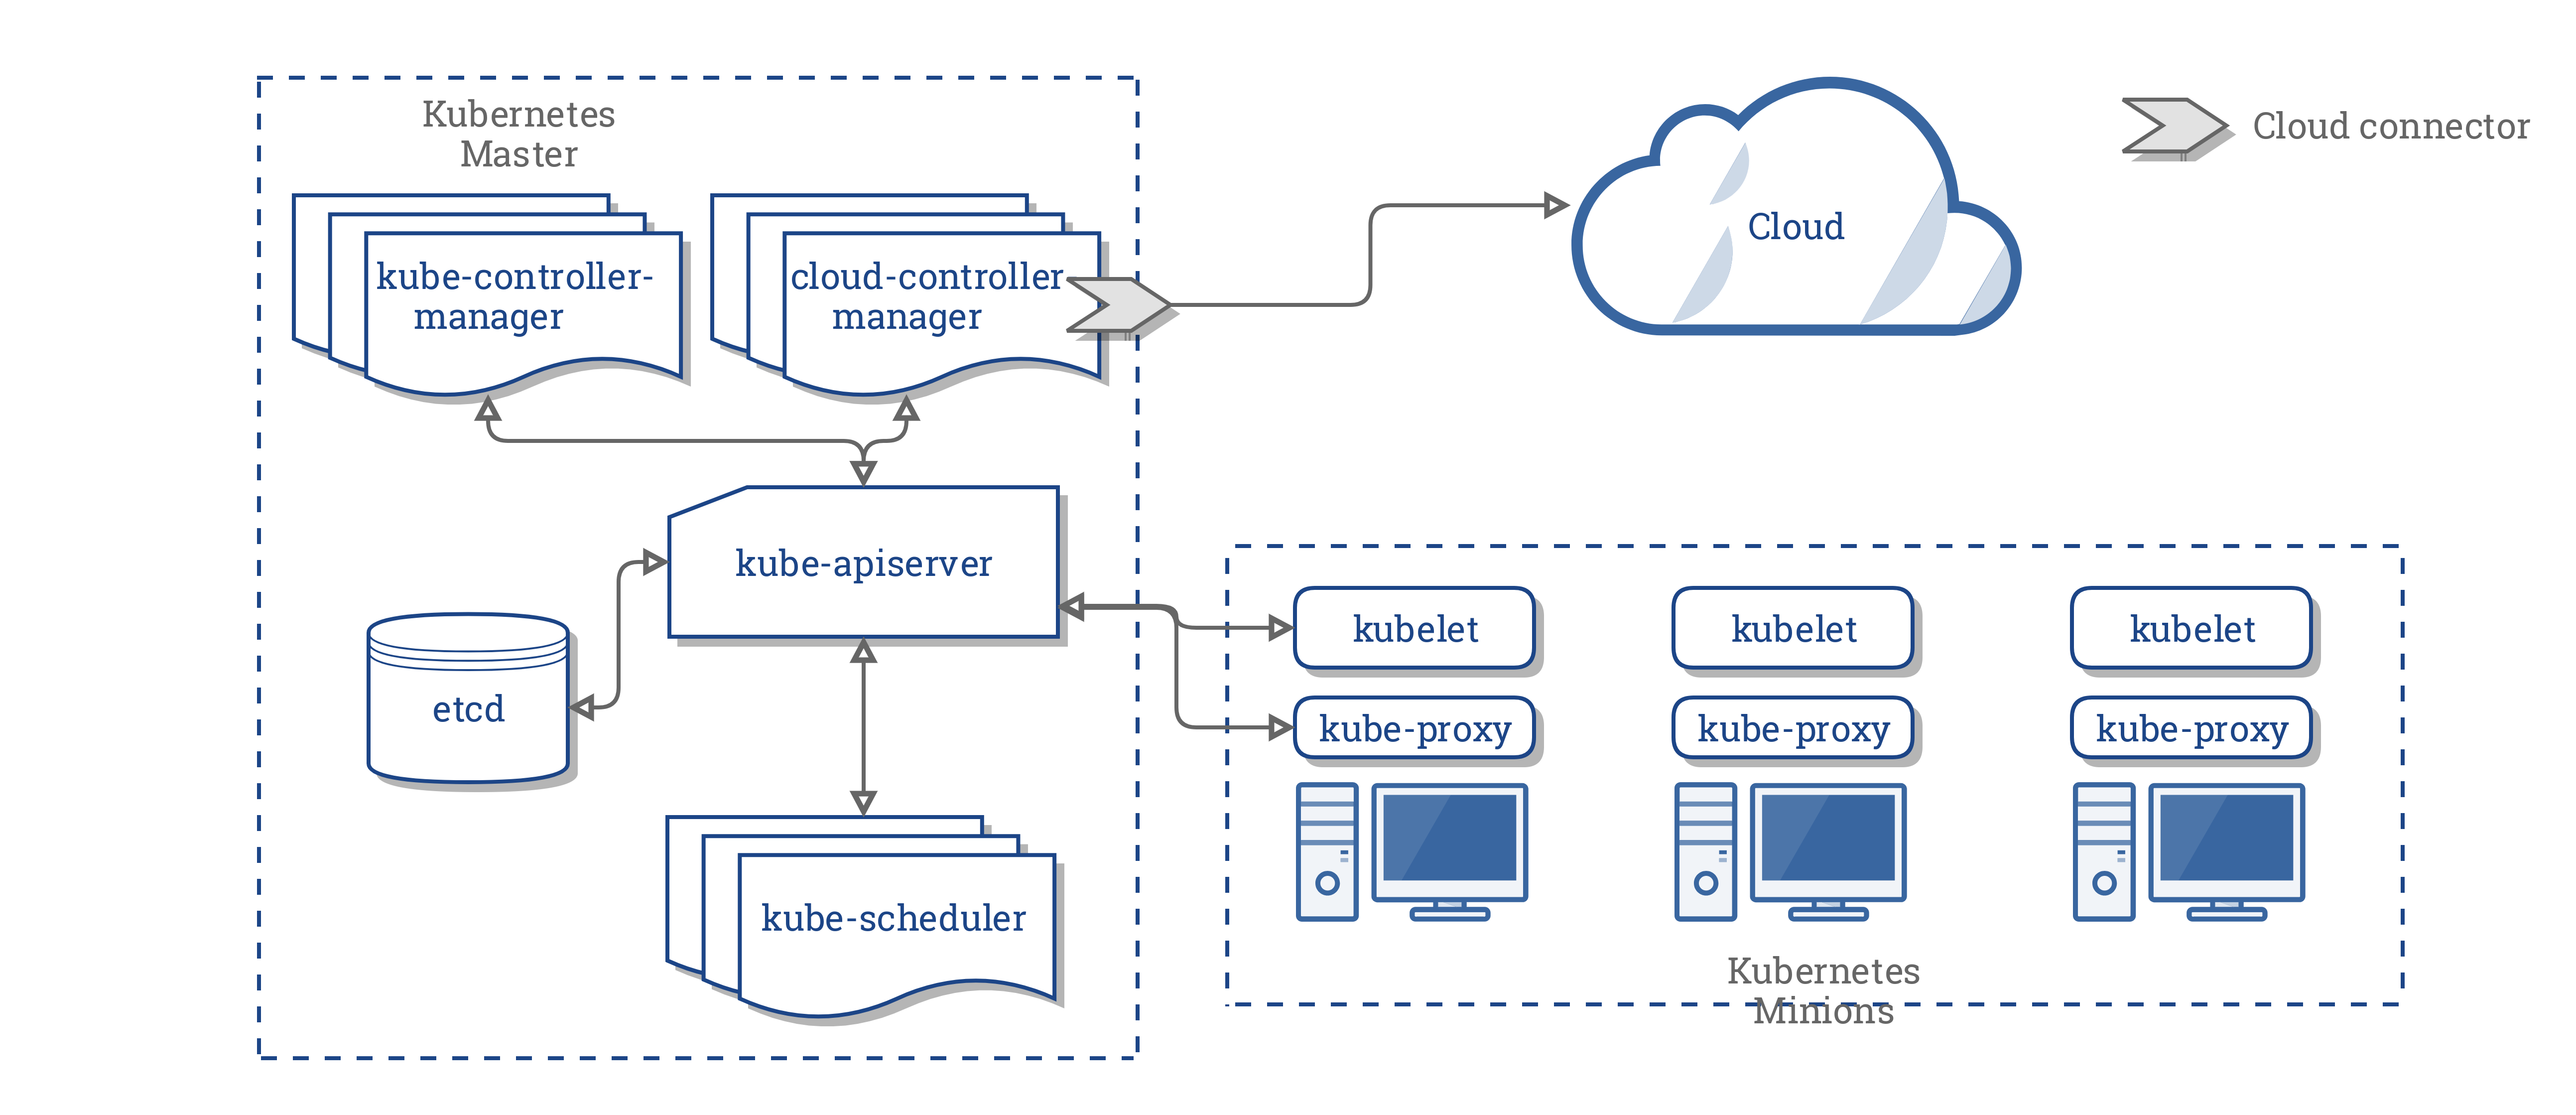


#### Ingress controller
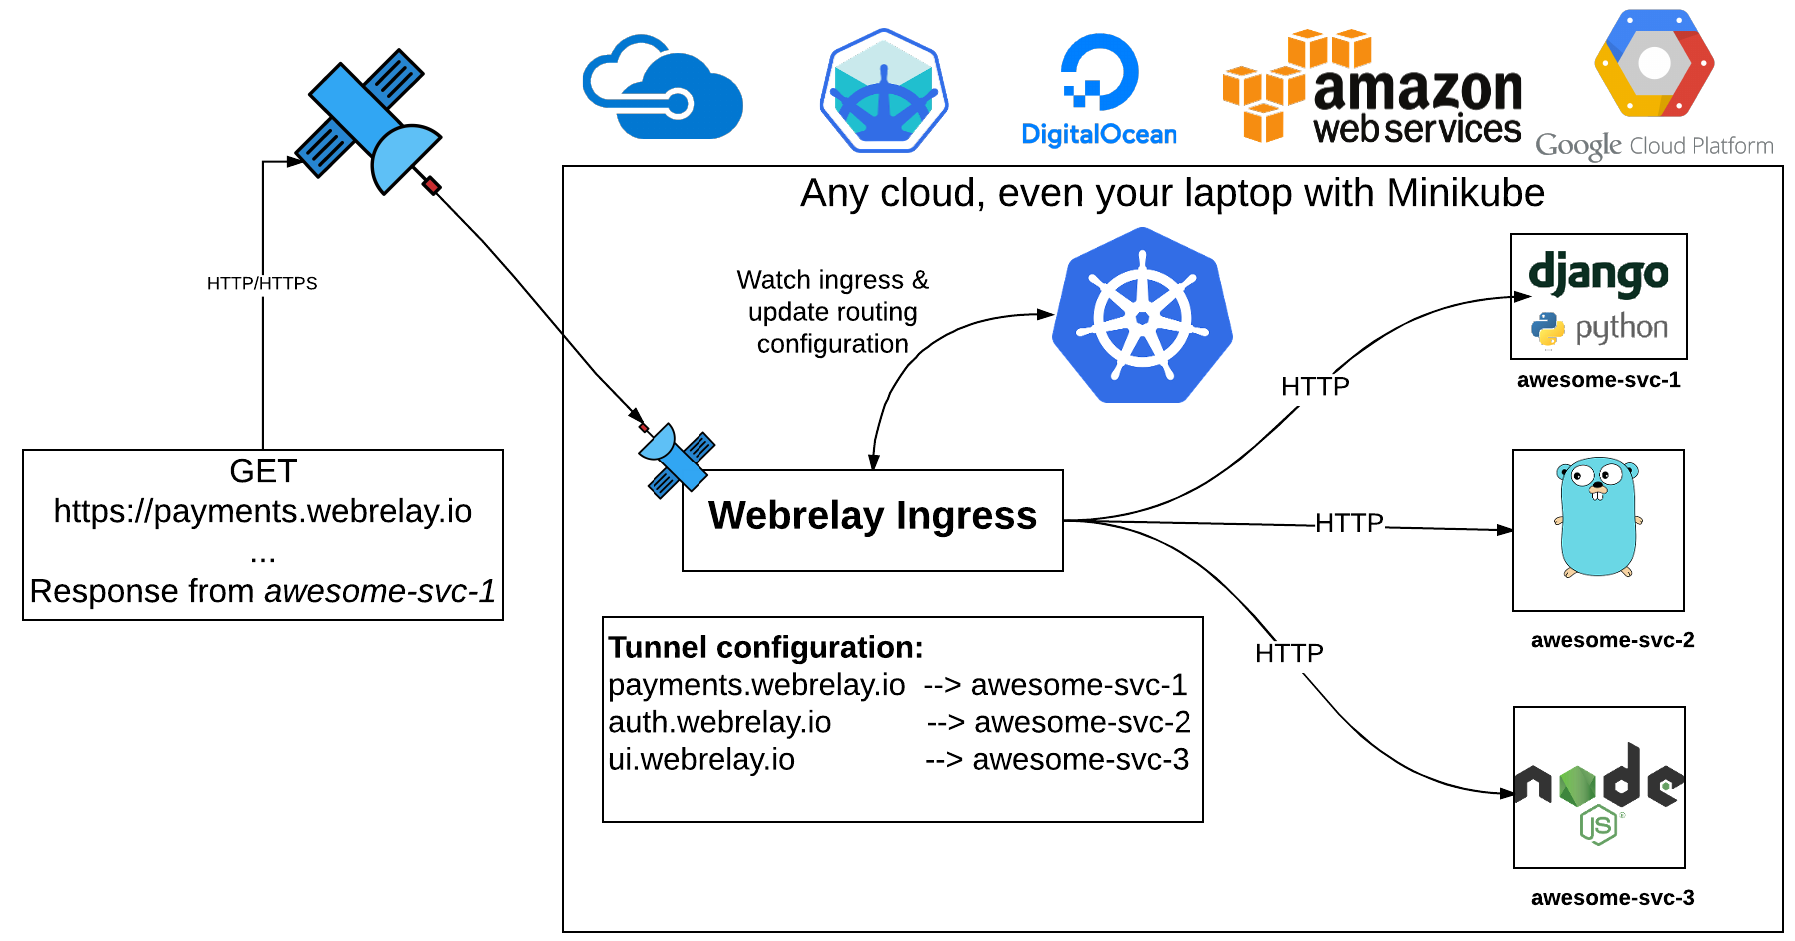


## kubectl命令

```
kubectl [command] [TYPE] [NAME] [flags]
```

#### command:
- create
- get
- describe
- delete

#### TYPE:
- namespaces
- nodes
- pods
- deployments
- services
- ingresses


#### Examples:

kubectl get pods
kubectl describe services <service_name>
kubectl delete deployments <deployment_name>


## pod模板

```
apiVersion: v1
kind: Pod
metadata:
  name: myapp-pod
  labels:
    app: myapp
spec:
  containers:
  - name: myapp-container
    image: busybox
    command: ['sh', '-c', 'echo Hello Kubernetes! && sleep 3600']
```

## deployment模板

```
apiVersion: apps/v1
kind: Deployment
metadata:
  name: nginx-deployment
  labels:
    app: nginx
spec:
  replicas: 3
  selector:
    matchLabels:
      app: nginx
  template:
    metadata:
      labels:
        app: nginx
    spec:
      containers:
      - name: nginx
        image: nginx:1.15.4
        ports:
        - containerPort: 80
```

### service模板

Kubernetes ServiceTypes allow you to specify what kind of service you want. The default is ClusterIP.

Type values and their behaviors are:

- ClusterIP: Exposes the service on a cluster-internal IP. Choosing this value makes the service only reachable from within the cluster. This is the default ServiceType.

- NodePort: Exposes the service on each Node’s IP at a static port (the NodePort). A ClusterIP service, to which the NodePort service will route, is automatically created. You’ll be able to contact the NodePort service, from outside the cluster, by requesting <NodeIP>:<NodePort>.
    
- LoadBalancer: Exposes the service externally using a cloud provider’s load balancer. NodePort and ClusterIP services, to which the external load balancer will route, are automatically created.


```
kind: Service
apiVersion: v1
metadata:
  name: my-service
spec:
  selector:
    app: MyApp
  ports:
  - name: http
    protocol: TCP
    port: 80
    targetPort: 9376
  - name: https
    protocol: TCP
    port: 443
    targetPort: 9377
```

### ingress模板
使得kubernetes集群外的http或者https请求能够访问到集群内的服务

```
apiVersion: extensions/v1beta1
kind: Ingress
metadata:
  name: simple-fanout-example
  annotations:
    nginx.ingress.kubernetes.io/rewrite-target: /
spec:
  rules:
  - host: foo.bar.com
    http:
      paths:
      - path: /foo
        backend:
          serviceName: service1
          servicePort: 4200
      - path: /bar
        backend:
          serviceName: service2
          servicePort: 8080
```